In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.simplefilter('ignore')

In [2]:
train = pd.read_csv("../Dataset/sample/training.csv")
test = pd.read_csv("../Dataset/sample/testing.csv")

In [4]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [5]:
labels = train['prognosis'].value_counts()
labels

Cervical spondylosis                       120
Hepatitis D                                120
Pneumonia                                  120
Urinary tract infection                    120
Hepatitis E                                120
Paralysis (brain hemorrhage)               120
Bronchial Asthma                           120
AIDS                                       120
Hepatitis B                                120
Fungal infection                           120
Hyperthyroidism                            120
hepatitis A                                120
Hypothyroidism                             120
Alcoholic hepatitis                        120
Diabetes                                   120
Heart attack                               120
Drug Reaction                              120
Hepatitis C                                120
Typhoid                                    120
Dimorphic hemmorhoids(piles)               120
Chronic cholestasis                        120
Impetigo     

In [21]:
data = train.drop(['prognosis','Unnamed: 133'],axis=1)
label = train['prognosis']
le = LabelEncoder()
le.fit_transform(label)

<IPython.core.display.Javascript object>

array([15, 15, 15, ..., 38, 35, 27])

In [34]:
data.isna().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

In [23]:
np.array(label).reshape(-1,1)

array([['Fungal infection'],
       ['Fungal infection'],
       ['Fungal infection'],
       ...,
       ['Urinary tract infection'],
       ['Psoriasis'],
       ['Impetigo']], dtype=object)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
xtrain, xtest, ytrain, ytest = train_test_split(data, np.array(label).reshape(-1,1), test_size=0.2, shuffle=True, random_state= 40)

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
y_pred = dtc.predict(xtest)
print(accuracy_score(ytest,y_pred))

1.0


In [26]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(xtrain,ytrain)
y_pred = gb.predict(xtest)
print(accuracy_score(ytest,y_pred))

1.0


In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=18)
rfc.fit(xtrain,ytrain)
y_pred = rfc.predict(xtest)
print(accuracy_score(ytest,y_pred))

1.0


In [29]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(xtrain,ytrain)
y_pred = svc.predict(xtest)
print(accuracy_score(ytest,y_pred))

1.0


In [31]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(cv = 3, random_state=43)

lrcv.fit(xtrain,ytrain)
y_pred = lrcv.predict(xtest)
print(accuracy_score(ytest,y_pred))

1.0


In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
#     'bootstrap': [True],
    'max_depth': [70, 80, 90, 100, 110],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 3, 4, 7],
    'n_estimators': [100, 200, 300, 400],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [36]:
grid_search.fit(xtrain, ytrain)
grid_search.best_params_

Fitting 4 folds for each of 320 candidates, totalling 1280 fits


{'max_depth': 70,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [37]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_labels,predictions)
    print('Model Performance')
    print('Accuracy = {:0.5f}%.'.format(accuracy))
    
    return accuracy

In [38]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, xtest, ytest)

Model Performance
Accuracy = 1.00000%.


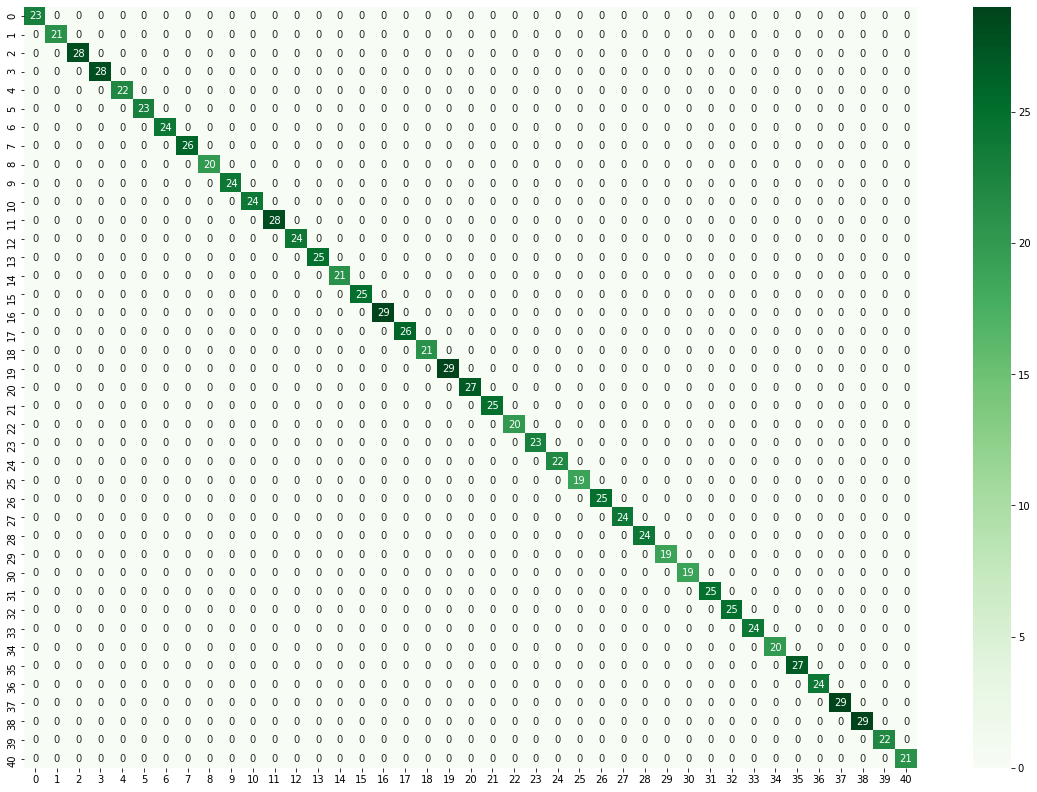

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = best_grid.predict(xtest)
cf = confusion_matrix(ytest,y_pred)
plt.figure(figsize=(20,14))
sns.heatmap(cf,annot=True,cmap="Greens")

NameError: name 'encode_severity' is not defined

In [107]:
symp

0     3.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
dtype: float64

In [143]:
y_pred_prob = dtc.predict_proba(np.array(symp).reshape(1,-1))
y_pred_prob

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [144]:
dtc.predict(np.array(symp).reshape(1,-1))

array(['Acne'], dtype=object)

In [115]:
print(np.argmax(y_pred_prob))

2
